<a href="https://colab.research.google.com/github/Manal5664/pytorch/blob/main/Pytorch_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

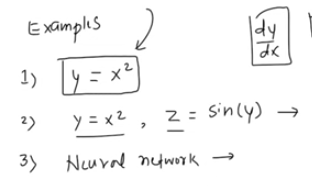

Part 1

In [1]:
import torch

In [3]:
x=torch.tensor(3.0, requires_grad=True)
y=x**2

In [4]:
print(x)
print(y)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)


In [6]:
y.backward()

In [7]:
x.grad

tensor(6.)

Part 2

In [5]:
import math

In [18]:
def dz_dy(x):
  return 2*x*math.cos(x**2)

In [19]:
dz_dy(4)

-7.661275842587077

In [21]:
x=torch.tensor(4.0, requires_grad=True)
y= x** 2

In [22]:
z=torch.sin(y)

In [23]:
x

tensor(4., requires_grad=True)

In [24]:
y

tensor(16., grad_fn=<PowBackward0>)

In [25]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [26]:
z.backward()

In [27]:
x.grad

tensor(-7.6613)

In [28]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


part *3* Maually

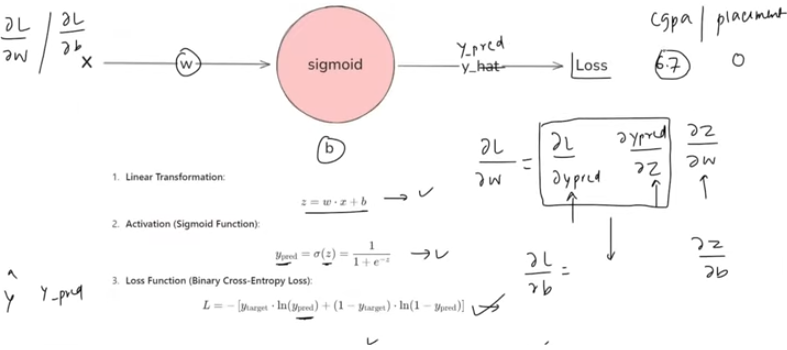

In [33]:
import torch
# Inputs

x= torch.tensor(6.7)
y= torch.tensor(0.0)

w= torch.tensor(1.0)
b=torch.tensor(0.0)

In [34]:
# Binary Cross-Entropy Loss for scalar

def BinaryCrossEntropy(prediction, target):
  epsilon=1e-8  # To prevent log(0)
  prediction= torch.clamp(prediction , epsilon , 1- epsilon )
  return -(target*torch.log(prediction) + (1-target)*torch.log(1-prediction))

In [35]:
# Forward pass
z= w *x + b  #Weighted sum(linear part)
y_pred = torch.sigmoid(z)

# Compute binary cross-entropy-loss
loss= BinaryCrossEntropy(y_pred, y)


In [36]:
loss

tensor(6.7012)

In [39]:

# Derivatives
# 1.dL/d(y_pred): loss w.r.t prediction
dloss_dy_pred =(y_pred - y) /(y_pred * (1-y_pred))

# dy_pred/dz:prediction(y_pred) w.r.t z (sigmoid derivative)
dy_pred_dz= y_pred * (1-y_pred)

# dz/dw and dz/bd: z w.r.t to w and b
dz_dw= x
dz_db= 1

dL_dw=dloss_dy_pred * dy_pred_dz * dz_dw
dl_db = dloss_dy_pred * dy_pred_dz * dz_db



In [40]:
print(f"Maual gradient of loss w.r.r weight (dw) :{dL_dw}")
print(f"Maual gradient of loss w.r.r bias (db) :{dl_db}")


Maual gradient of loss w.r.r weight (dw) :6.691762447357178
Maual gradient of loss w.r.r bias (db) :0.998770534992218


Part 3 by Autograd

In [41]:
x=torch.tensor(6.7)
y=torch.tensor(0.0)

In [42]:
w=torch.tensor(1.0, requires_grad=True)
b=torch.tensor(0.0, requires_grad=True)


In [43]:
w

tensor(1., requires_grad=True)

In [44]:
b

tensor(0., requires_grad=True)

In [45]:
z= w*x+b

In [46]:
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [47]:
y_pred=torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [48]:
loss=BinaryCrossEntropy(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [49]:
loss.backward()

In [50]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


vector input tensors

In [51]:
x=torch.tensor([1.,2.0,3.0], requires_grad=True)

In [52]:
x

tensor([1., 2., 3.], requires_grad=True)

In [54]:
y=(x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [55]:
y.backward()

In [65]:
x.grad

tensor(4.)

In [66]:
# clearing grad
x=torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [81]:
y=x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [82]:
y.backward()


In [84]:
x.grad

tensor(4.)

In [85]:
x.grad.zero_()

tensor(0.)

Disables gradient tracking

In [86]:
x=torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [87]:
y=x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [88]:
y.backward()

In [89]:
x.grad

tensor(4.)

In [ ]:
# option 1 - requires_grad(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [90]:
# option 1 - requires_grad(False)
x.requires_grad_(False)

tensor(2.)

In [91]:
x

tensor(2.)

In [92]:
y=x**2

In [93]:
y

tensor(4.)

In [96]:
# y.backward() it'll give an error

In [97]:
# option 2 - detach()

x=torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [98]:
z= x.detach()
z

tensor(2.)

In [99]:
y = x**2

In [100]:
y

tensor(4., grad_fn=<PowBackward0>)

In [102]:
y1=z**2

In [103]:
y.backward()

In [105]:
# y1.backward()

In [106]:
# option 3 - torch.no_grad()
x= torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [111]:
with torch.no_grad():
  y=x**2

In [112]:
y

tensor(4.)

In [114]:
# y.backward()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')